In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd

In [13]:
id_df = pd.read_csv('id_df_SRI_jpg_radar_1.csv')

# Convert 'time' columns to time, format is hour:minute:second
id_df['date_time'] = pd.to_datetime(id_df['date_time'], format='%Y-%m-%d %H:%M:%S')

id_df['time_diff'] = id_df.iloc[::-1]['date_time'].diff()

print(len(id_df[id_df['time_diff'] < pd.Timedelta(minutes=11)]))

id_df = id_df[id_df['time_diff'] < pd.Timedelta(minutes=11)]

18403


In [14]:
id_df

,id,date_time,time_diff
170,2457769,2024-10-28 09:10:00,0 days 00:05:00
255,2455220,2024-10-26 14:00:00,0 days 00:10:00
256,2455200,2024-10-26 13:50:00,0 days 00:10:00
257,2455180,2024-10-26 13:40:00,0 days 00:10:00
258,2455162,2024-10-26 13:30:00,0 days 00:10:00
...,...,...,...
23213,1944353,2024-04-10 14:40:00,0 days 00:10:00
23214,1944330,2024-04-10 14:30:00,0 days 00:10:00
23215,1944313,2024-04-10 14:20:00,0 days 00:05:00
23216,1944297,2024-04-10 14:15:00,0 days 00:05:00


In [10]:
def print_image(image_path):
    img = mpimg.imread(image_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

# using some geometry, we find the values of x, y, w, h to crop the image in the optimal way

def crop_image(image_path = None, x=73, y=73, w=354, h=354, output_path=None):
    img = cv2.imread(image_path)
    crop_img = img[y:y+h, x:x+w]
    cv2.imwrite(output_path, crop_img)

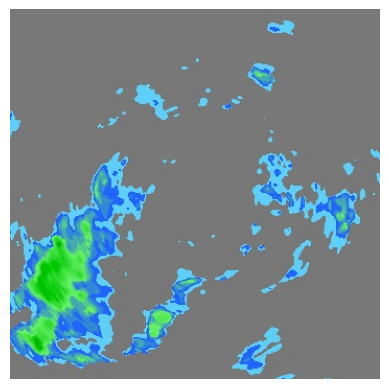

In [4]:
crop_image("images/2447756.jpg", output_path="images/2447756_crop.jpg")

print_image("images/2447756_crop.jpg")

In [15]:
for index, row in id_df.iterrows():
    image_path = f"../../scratch/images/{row["id"]}.jpg"
    output_path = f"../../scratch/cropped_images/{row["id"]}_crop.jpg"
    crop_image(image_path=image_path, output_path=output_path)
    